In [2]:
from IPython.display import clear_output
! pip install mesa
clear_output()

In [3]:
from mesa import Agent, Model
from mesa.time import BaseScheduler

In [4]:
import numpy as np
import pandas as pd

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
import seaborn as sn 

## 1. Создание модели
Я решила рассмотреть две модели: простую, в которой за время одной итерации каждый агент взаимодействует с одним случайно выбранным агентом. Мнения обновляются сразу;
модель посложнее, в котой за время одной итерации каждый агент взаимодействует со всеми остальными агентами. Мнения обновляются после того, как все агенты провзаимодействовали.

### 1.1 Простая модель

In [7]:
class TheSimpliestAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        if self.unique_id < int(N*pe*(1 - delta)/2):
          self.opinion = np.random.uniform(-1, -0.9)
          self.u = ue
        elif self.unique_id >= int(N - N*pe*(1 + delta)/2):
          self.opinion = np.random.uniform(0.9, 1)
          self.u = ue
        else:
          self.opinion = np.random.uniform(-0.9,0.9)
          self.u = u
                
    def step(self):
        
        other_agent = self.random.choice(self.model.schedule.agents)

        #замена агента, если номера агентов совпали
        if other_agent.unique_id == self.unique_id:
          while other_agent.unique_id == self.unique_id:
            other_agent = self.random.choice(self.model.schedule.agents)
              
        #вычисление пересечения мнений
        hij = min(min(other_agent.opinion + other_agent.u, 1), min(self.opinion + self.u,1)) - max(max(other_agent.opinion - other_agent.u,-1), max(self.opinion - self.u, -1))
        if hij < 0:
          hij = 0

        #вычисление соглашения 
        relative_agreement = hij/other_agent.u -1 
        #print(self.unique_id, self.opinion, self.u, hij)
        #print(other_agent.unique_id, other_agent.opinion, other_agent.u, hij)
        #print('-------------')
        if hij <= other_agent.u:
          pass
        else:
          self.opinion = self.opinion + mu*relative_agreement*(other_agent.opinion - self.opinion)
          if self.opinion > 1:
            self.opinion = 1
          if self.opinion < -1:
            self.opinion = -1
          self.u = self.u + mu*relative_agreement*(other_agent.u - self.u)
          if self.u > 2:
            self.u = 2
          if self.u < 0:
            self.u = 0
                          
        pass

In [8]:
class TheSimpliestModel(Model):
    def __init__(self, N):
        self.num_agents = N
        self.schedule = BaseScheduler(self)
        
        # Create agents
        for i in range(self.num_agents):
            self.a = TheSimpliestAgent(i, self)
            self.schedule.add(self.a)
            
    def step(self):
         
        self.schedule.step()
        

Графики для параметров из статьи. В качестве критерия сходимости использовалось среднее модулей мнений на каждом шаге. Если оно не меняется с точностью до сотых 20 шагов, то это считается сходимостью.

In [9]:
u_ = [0.4, 1.2, 1.4]
ue = 0.1
mu = 0.5
N = 200
pe_ = [0.2, 0.25, 0.1]
delta = 0

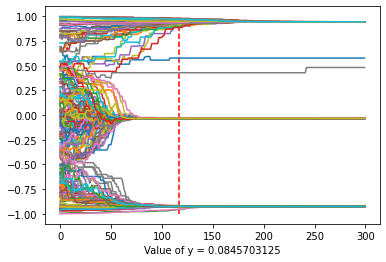

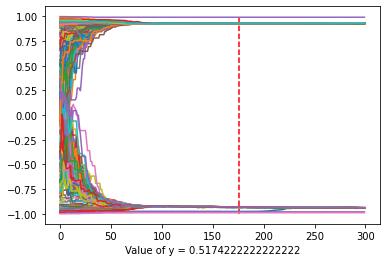

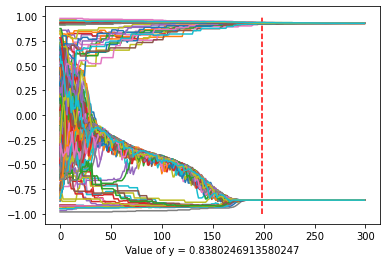

In [10]:
for n in range (3):
    u = u_[n]
    pe = pe_[n]
    #run model
    model = TheSimpliestModel(N)
    agent_opinions = []
    for i in range(300):
        model.step()
        #print('STEP=', i)
        agent_opinion = [a.opinion for a in model.schedule.agents]
        agent_opinions.append(agent_opinion)

    agent_opinions = np.array(agent_opinions)

    #find convergence    
    a = int(N*pe*(1 - delta)/2)
    b = N - int(N*pe*(1 - delta)/2)
    moderate_agents = agent_opinions.T[a:b]

    y = []
    for i in range(moderate_agents.shape[1]):
      became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
      became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
      y.append(became_extr_pos**2 + became_extr_neg**2)
    sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
    count = 0
    for i in range(1, sum_of_opinions.shape[0]):
      if sum_of_opinions[i] == sum_of_opinions[i-1]:
        count +=1
      else:
        count = 0
      if count == 30:
        convergence = i
        pass
        
    #plot graph
    time = [i for i in range(300)]
    agent_opinions = agent_opinions.T
    fig, ax = plt.subplots()
    for i in range(agent_opinions.shape[0]):
      ax.plot(time, agent_opinions[i]) 
    ax.vlines(convergence, -1, 1, color = 'r', linestyle = 'dashed')
    ax.set_xlabel('Value of y = '+ str(y[convergence]))
    plt.show()

  

Модель без экстремистов.

In [112]:
class TheSimpliestAgent_NE(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.opinion = np.random.uniform(-1, 1)
        self.u = u
                        
    def step(self):
        
        other_agent = self.random.choice(self.model.schedule.agents)

        #замена агента, если номера агентов совпали
        if other_agent.unique_id == self.unique_id:
          while other_agent.unique_id == self.unique_id:
            other_agent = self.random.choice(self.model.schedule.agents)
              
        #вычисление пересечения мнений
        hij = min(min(other_agent.opinion + other_agent.u, 1), min(self.opinion + self.u,1)) - max(max(other_agent.opinion - other_agent.u,-1), max(self.opinion - self.u, -1))
        if hij < 0:
          hij = 0

        #вычисление соглашения 
        relative_agreement = hij/other_agent.u -1 
        #print(self.unique_id, self.opinion, self.u, hij)
        #print(other_agent.unique_id, other_agent.opinion, other_agent.u, hij)
        #print('-------------')
        if hij <= other_agent.u:
          pass
        else:
          self.opinion = self.opinion + mu*relative_agreement*(other_agent.opinion - self.opinion)
          if self.opinion > 1:
            self.opinion = 1
          if self.opinion < -1:
            self.opinion = -1
          self.u = self.u + mu*relative_agreement*(other_agent.u - self.u)
          if self.u > 2:
            self.u = 2
          if self.u < 0:
            self.u = 0
                          
        pass

In [113]:
class TheSimpliestModel_NE(Model):
    def __init__(self, N):
        self.num_agents = N
        self.schedule = BaseScheduler(self)
        
        # Create agents
        for i in range(self.num_agents):
            self.a = TheSimpliestAgent_NE(i, self)
            self.schedule.add(self.a)
            
    def step(self):
         
        self.schedule.step()

In [109]:
u = 0.4
mu = 0.25
N = 200

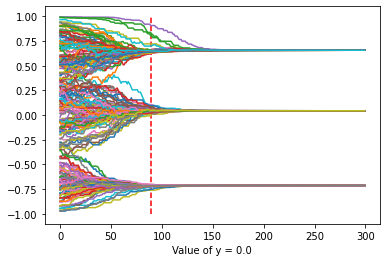

In [117]:
#run model
model = TheSimpliestModel_NE(N)
agent_opinions = []
for i in range(300):
    model.step()
    #print('STEP=', i)
    agent_opinion = [a.opinion for a in model.schedule.agents]
    agent_opinions.append(agent_opinion)

agent_opinions = np.array(agent_opinions)

#find convergence    
a = int(N*pe*(1 - delta)/2)
b = N - int(N*pe*(1 - delta)/2)
moderate_agents = agent_opinions.T[a:b]

y = []
for i in range(moderate_agents.shape[1]):
  became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
  became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
  y.append(became_extr_pos**2 + became_extr_neg**2)
sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
count = 0
for i in range(1, sum_of_opinions.shape[0]):
  if sum_of_opinions[i] == sum_of_opinions[i-1]:
    count +=1
  else:
    count = 0
  if count == 30:
    convergence = i
    pass
    
#plot graph
time = [i for i in range(300)]
agent_opinions = agent_opinions.T
fig, ax = plt.subplots()
for i in range(agent_opinions.shape[0]):
  ax.plot(time, agent_opinions[i]) 
ax.vlines(convergence, -1, 1, color = 'r', linestyle = 'dashed')
ax.set_xlabel('Value of y = '+ str(y[convergence]))
plt.show()


### 1.2 Более сложная модель

In [10]:
class Agent(Agent):
    
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        if self.unique_id < int(N*pe*(1 - delta)/2):
          self.opinion = np.random.uniform(-1, -0.9)
          self.u = ue
        elif self.unique_id >= int(N - N*pe*(1 + delta)/2):
          self.opinion = np.random.uniform(0.9, 1)
          self.u = ue
        else:
          self.opinion = np.random.uniform(-0.9,0.9)
          self.u = u  
        self.new_opinion = self.opinion
        self.new_u = self.u  

    def step(self):
        
        for i in range (self.model.num_agents):
          if i == self.unique_id:
            pass
          else:
            other_agent = self.model.schedule.agents[i]

            #вычисление пересечения мнений
            hij = min(min(other_agent.opinion + other_agent.u, 1), min(self.opinion + self.u,1)) - max(max(other_agent.opinion - other_agent.u,-1), max(self.opinion - self.u, -1))
            if hij < 0:
              hij = 0

            #вычисление соглашения 
            relative_agreement = hij/other_agent.u -1 
            #print(self.unique_id, self.opinion, self.u, hij)
            #print(other_agent.unique_id, other_agent.opinion, other_agent.u)
            
            if hij <= other_agent.u:
              pass
            else:
              self.new_opinion += mu/(N-1)*relative_agreement*(other_agent.opinion - self.opinion) # деление на N, так как влияние суммируется от всех остальных агентов 
              if self.new_opinion > 1:
                self.new_opinion = 1
              if self.new_opinion < -1:
                self.new_opinion = -1
              self.new_u += mu/(N-1)*relative_agreement*(other_agent.u - self.u)
              if self.new_u > 2:
                self.new_u = 2
              if self.new_u < 0:
                self.new_u = 0
              #print(self.unique_id, self.new_opinion, self.new_u)
              #print('-------------')
        self.model.opinions.append(self.new_opinion)
        self.model.us.append(self.new_u)
          
        pass

In [11]:
class Model(Model):
    def __init__(self, N):
        self.num_agents = N
        self.schedule = BaseScheduler(self)
        self.opinions = []
        self.us = []
        # Create agents
        for i in range(self.num_agents):
            self.a = Agent(i, self)
            self.schedule.add(self.a)
            
    def step(self):
        self.opinions = [] 
        self.us = []
        self.schedule.step()
        i = 0
        for self.a in model.schedule.agents:
          self.a.opinion = self.opinions[i]
          self.a.u = self.us[i]
          i += 1
        #print(self.opinions)
        #print(self.us)

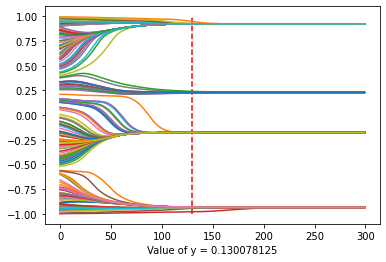

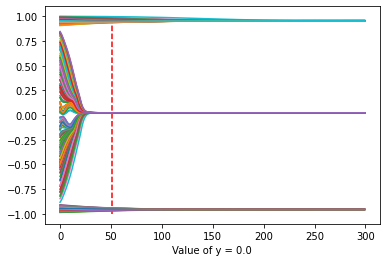

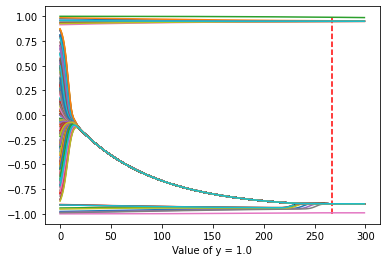

In [13]:
for n in range (3):
    u = u_[n]
    pe = pe_[n]
    model = Model(N)
    agent_opinions = []
    for i in range(300):
        model.step()
        #print('STEP=', i)
        agent_opinion = [a.opinion for a in model.schedule.agents]
        agent_opinions.append(agent_opinion)
    agent_opinions = np.array(agent_opinions)

    #find convergence    
    a = int(N*pe*(1 - delta)/2)
    b = N - int(N*pe*(1 - delta)/2)
    moderate_agents = agent_opinions.T[a:b]

    y = []
    for i in range(moderate_agents.shape[1]):
      became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
      became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
      y.append(became_extr_pos**2 + became_extr_neg**2)
    sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
    count = 0
    for i in range(1, sum_of_opinions.shape[0]):
      if sum_of_opinions[i] == sum_of_opinions[i-1]:
        count +=1
      else:
        count = 0
      if count == 30:
        convergence = i
        pass
    #plot graph
    time = [i for i in range(300)]
    agent_opinions = agent_opinions.T
    fig, ax = plt.subplots()
    for i in range(agent_opinions.shape[0]):
      ax.plot(time, agent_opinions[i]) 
    ax.vlines(convergence, -1, 1, color = 'r', linestyle = 'dashed')
    ax.set_xlabel('Value of y = '+ str(y[convergence]))
    plt.show()

Модель без экстремистов.

In [119]:
class Agent_NE(Agent):
    
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
        self.opinion = np.random.uniform(-1, 1)
        self.u = u
         
        self.new_opinion = self.opinion
        self.new_u = self.u  

    def step(self):
        
        for i in range (self.model.num_agents):
          if i == self.unique_id:
            pass
          else:
            other_agent = self.model.schedule.agents[i]

            #вычисление пересечения мнений
            hij = min(min(other_agent.opinion + other_agent.u, 1), min(self.opinion + self.u,1)) - max(max(other_agent.opinion - other_agent.u,-1), max(self.opinion - self.u, -1))
            if hij < 0:
              hij = 0

            #вычисление соглашения 
            relative_agreement = hij/other_agent.u -1 
            #print(self.unique_id, self.opinion, self.u, hij)
            #print(other_agent.unique_id, other_agent.opinion, other_agent.u)
            
            if hij <= other_agent.u:
              pass
            else:
              self.new_opinion += mu/(N-1)*relative_agreement*(other_agent.opinion - self.opinion) # деление на N, так как влияние суммируется от всех остальных агентов 
              if self.new_opinion > 1:
                self.new_opinion = 1
              if self.new_opinion < -1:
                self.new_opinion = -1
              self.new_u += mu/(N-1)*relative_agreement*(other_agent.u - self.u)
              if self.new_u > 2:
                self.new_u = 2
              if self.new_u < 0:
                self.new_u = 0
              #print(self.unique_id, self.new_opinion, self.new_u)
              #print('-------------')
        self.model.opinions.append(self.new_opinion)
        self.model.us.append(self.new_u)
          
        pass

In [120]:
class Model_NE(Model):
    def __init__(self, N):
        self.num_agents = N
        self.schedule = BaseScheduler(self)
        self.opinions = []
        self.us = []
        # Create agents
        for i in range(self.num_agents):
            self.a = Agent_NE(i, self)
            self.schedule.add(self.a)
            
    def step(self):
        self.opinions = [] 
        self.us = []
        self.schedule.step()
        i = 0
        for self.a in model.schedule.agents:
          self.a.opinion = self.opinions[i]
          self.a.u = self.us[i]
          i += 1
        #print(self.opinions)
        #print(self.us)

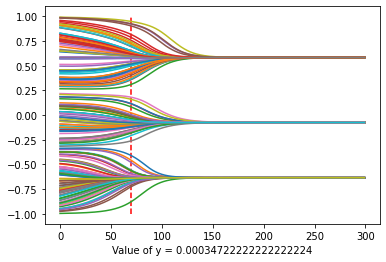

In [121]:
model = Model_NE(N)
agent_opinions = []
for i in range(300):
    model.step()
    #print('STEP=', i)
    agent_opinion = [a.opinion for a in model.schedule.agents]
    agent_opinions.append(agent_opinion)
agent_opinions = np.array(agent_opinions)

#find convergence    
a = int(N*pe*(1 - delta)/2)
b = N - int(N*pe*(1 - delta)/2)
moderate_agents = agent_opinions.T[a:b]

y = []
for i in range(moderate_agents.shape[1]):
  became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
  became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
  y.append(became_extr_pos**2 + became_extr_neg**2)
sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
count = 0
for i in range(1, sum_of_opinions.shape[0]):
  if sum_of_opinions[i] == sum_of_opinions[i-1]:
    count +=1
  else:
    count = 0
  if count == 30:
    convergence = i
    pass
#plot graph
time = [i for i in range(300)]
agent_opinions = agent_opinions.T
fig, ax = plt.subplots()
for i in range(agent_opinions.shape[0]):
  ax.plot(time, agent_opinions[i]) 
ax.vlines(convergence, -1, 1, color = 'r', linestyle = 'dashed')
ax.set_xlabel('Value of y = '+ str(y[convergence]))
plt.show()

## 2. Вариация параметров

### 2.1 Простая модель

Построены hitmaps для значений y при различных комбинациях параметров. Значения усреднялись на 10 прогонах.

In [14]:
u_ = [0.2, 0.6, 1, 1.4, 2.0]
pe_ = [0.1, 0.2, 0.3, 0.5]
ue_ = [0.05, 0.1, 0.15, 0.2]
mu_ = [0.1, 0.25, 0.5]
N_ = 200
delta_ = [0, 0.2, 0.5]

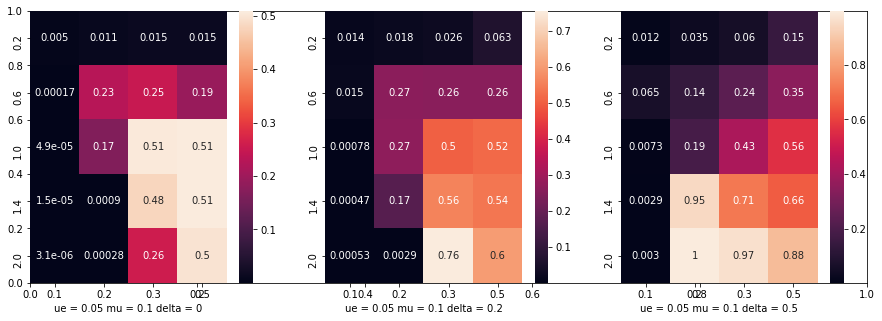

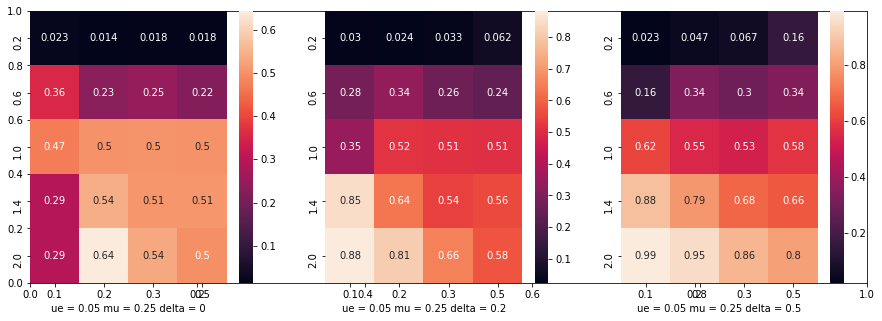

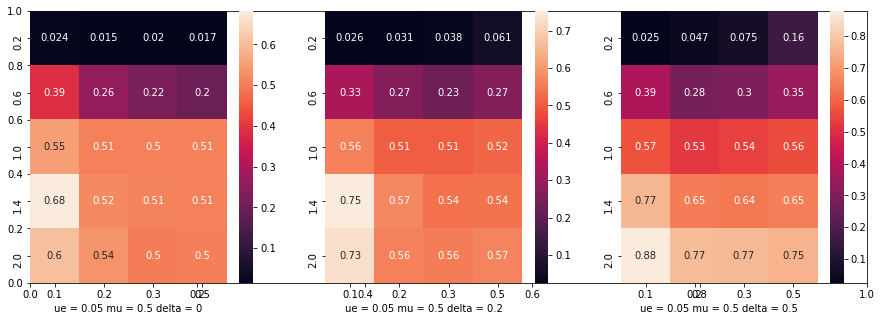

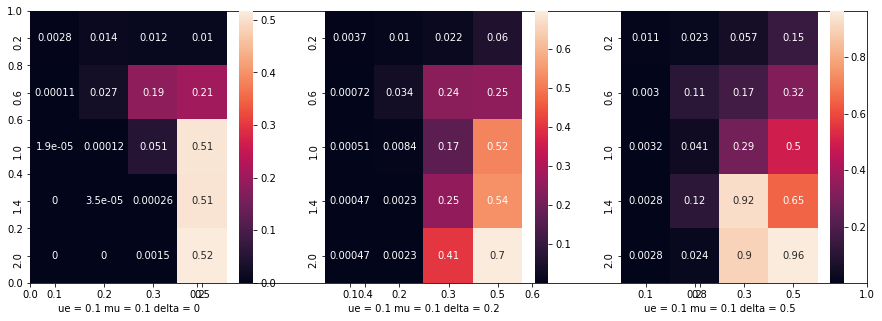

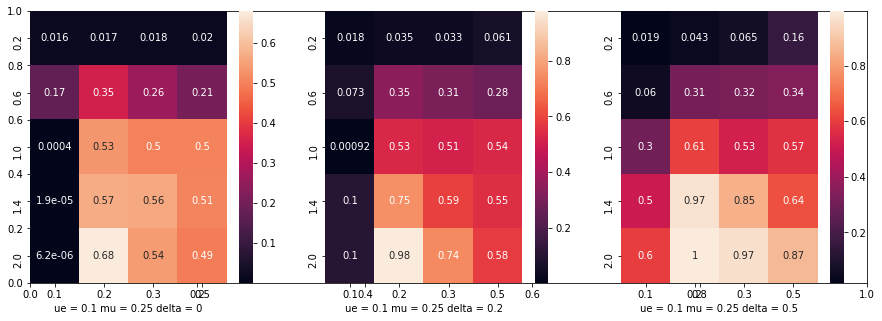

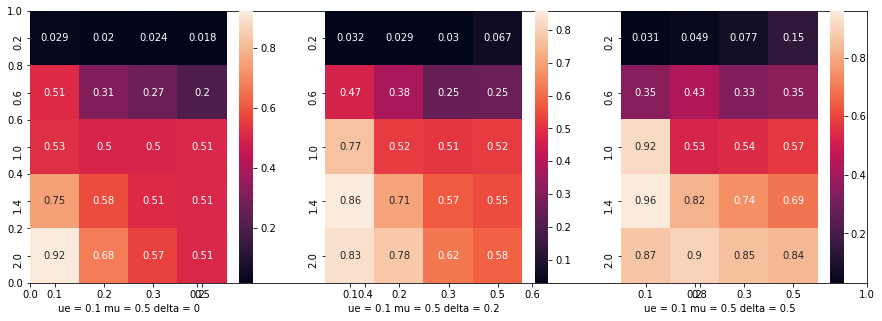

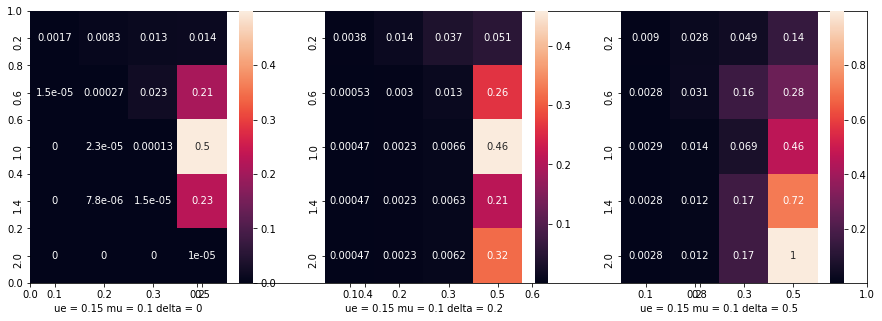

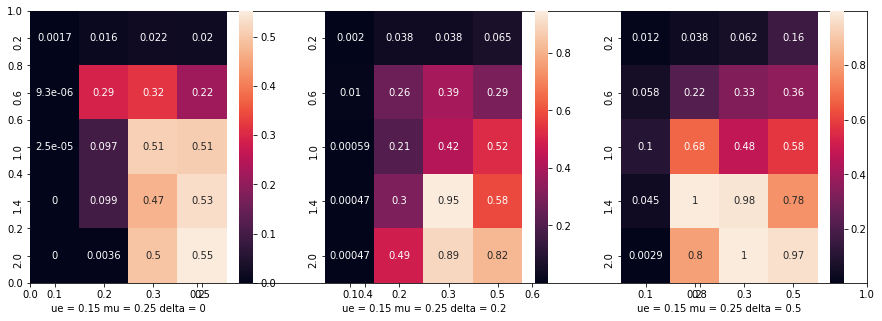

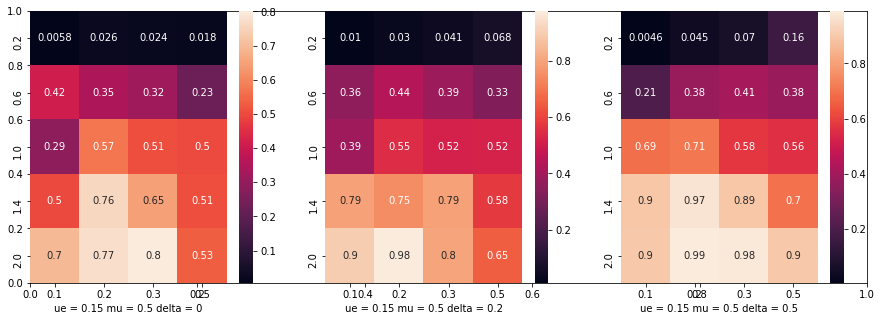

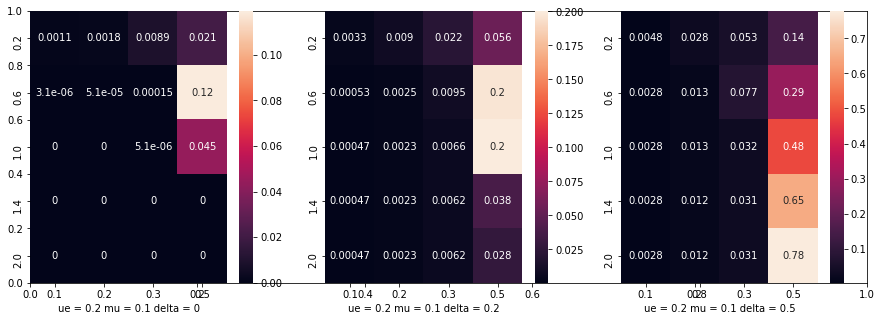

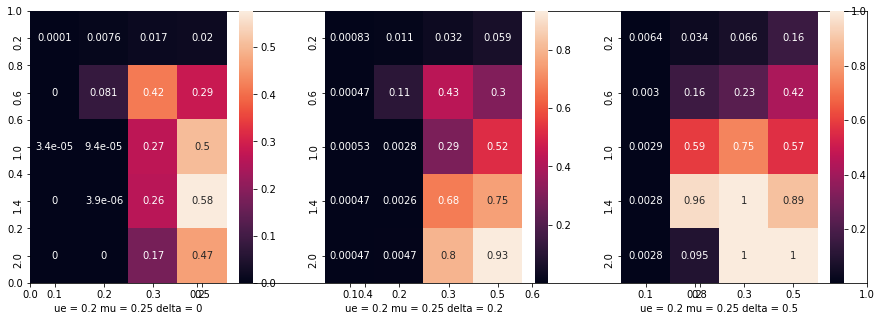

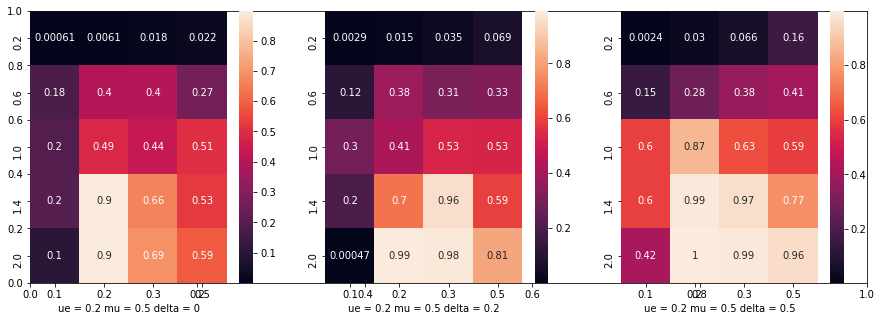

In [16]:

for l in range(4):
  ue = ue_ [l]
  for p in range (3):
     mu = mu_ [p]
     fig, ax = plt.subplots(figsize=(15,5))
     for r in range (3):
        delta = delta_ [r]
        y_variations = []
        for k in range(10):
          y_variation = [] 
          for n in range (5):
            u = u_[n]
            for m in range (4):
              
              pe = pe_[m]
              #run model
              model = TheSimpliestModel(N)
              agent_opinions = []
              for i in range(300):
                  model.step()
                  #print('STEP=', i)
                  agent_opinion = [a.opinion for a in model.schedule.agents]
                  agent_opinions.append(agent_opinion)

              agent_opinions = np.array(agent_opinions)

              #find convergence    
              a = int(N*pe*(1 - delta)/2)
              b = N - int(N*pe*(1 - delta)/2)
              moderate_agents = agent_opinions.T[a:b]

              y = []
              for i in range(moderate_agents.shape[1]):
                became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
                became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
                y.append(became_extr_pos**2 + became_extr_neg**2)
              sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
              count = 0
              for i in range(1, sum_of_opinions.shape[0]):
                if sum_of_opinions[i] == sum_of_opinions[i-1]:
                  count +=1
                else:
                  count = 0
                if count == 30:
                  convergence = i
                  pass
              y_variation.append(y[convergence])
              
          y_variations.append(y_variation)
        y_variation = np.mean(np.array(y_variations), axis = 0).reshape(5,4)
        y_variation = pd.DataFrame(y_variation, index = u_, columns = pe_)
        
        ax = fig.add_subplot(1,3,r+1) 
        sn.heatmap(y_variation, annot=True)
        ax.set_xlabel('ue = '+ str(ue)+' mu = '+str(mu)+ ' delta = '+str(delta))
     plt.show()

### 2.2 Сложная модель

*Построены только 2 графика, так как это занимает очень много времени. Для каждой комбинации параметров только один прогон

In [20]:
u_ = [0.2, 0.6, 1, 1.4, 2.0]
pe_ = [0.1, 0.2, 0.3, 0.5]
ue_ = [0.1, 0.2]
mu_ = [0.25, 0.5]
N_ = 100
delta_ = [0, 0.4]

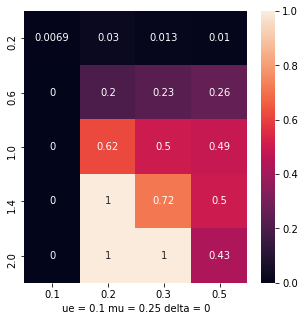

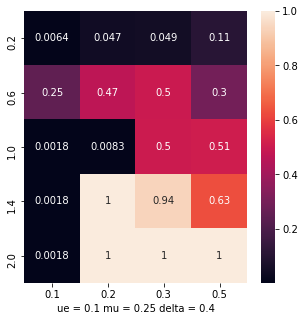

In [ ]:
for l in range(2):
  ue = ue_ [l]
  for p in range (2):
     mu = mu_ [p]
     
     for r in range (2):
        delta = delta_ [r]
        y_variation = []

        for n in range (5):
          u = u_[n]
          for m in range (4):
            
            pe = pe_[m]
            #run model
            model = Model(N)
            agent_opinions = []
            for i in range(300):
                model.step()
                #print('STEP=', i)
                agent_opinion = [a.opinion for a in model.schedule.agents]
                agent_opinions.append(agent_opinion)

            agent_opinions = np.array(agent_opinions)

            #find convergence    
            a = int(N*pe*(1 - delta)/2)
            b = N - int(N*pe*(1 - delta)/2)
            moderate_agents = agent_opinions.T[a:b]

            y = []
            for i in range(moderate_agents.shape[1]):
              became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
              became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
              y.append(became_extr_pos**2 + became_extr_neg**2)
            sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
            count = 0
            for i in range(1, sum_of_opinions.shape[0]):
              if sum_of_opinions[i] == sum_of_opinions[i-1]:
                count +=1
              else:
                count = 0
              if count == 30:
                convergence = i
                pass
            y_variation.append(y[convergence])
            
        y_variation = np.array(y_variation).reshape(5,4)
        y_variation = pd.DataFrame(y_variation, index = u_, columns = pe_)
        fig, ax = plt.subplots(figsize=(5,5))
        sn.heatmap(y_variation, annot=True)
        ax.set_xlabel('ue = '+ str(ue)+' mu = '+str(mu)+ ' delta = '+str(delta))
        plt.show()

Вывод для простой модели: 
- односторонняя сходимость наблюдается реже всего
- при мю = 0.1 преобладает центральная сходимость, что может означать, что в некоторых случаях модель не успела сойтись за 300 шагов из-за малого влияния агентов друг на друга0
- с увеличением параметра дельта растет односторонняя сходимость 
- односторонняя сходимость наблюдается при наибольшей неуверенности агентов и наименьшем числе экстремистов. 

Вывод для сложной модели:

- односторонняя сходимость наблюдается чаще, чем в простой модели. Это может быть связано с тем, что в некоторых случаях простая модель не успевала сойтись за 300 шагов
- разброс значений y для каждого типа сходимости ниже
- с увеличением параметра дельта растет односторонняя сходимость
- односторонняя сходимость наблюдается при наибольшей неуверенности агентов и наименьшем числе экстремистов. (совпадает с простой моделью)

## 3. Сравнение моделей

Рассмотрим набор параметров, при которых две модели показывают одинаковые значения y и оценим скорость сходимости моделей.

### 3.1. y = 0 - центральная сходимость. 

In [34]:
u = 0.2
pe = 0.1
ue = 0.1
mu = 0.25
N = 200
delta = 0

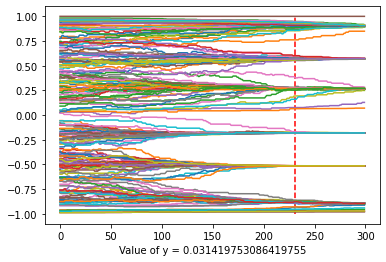

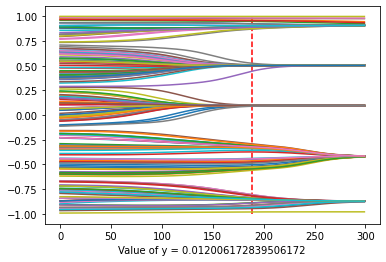

In [36]:
#run model
model = TheSimpliestModel(N)
agent_opinions = []
for i in range(300):
    model.step()
    #print('STEP=', i)
    agent_opinion = [a.opinion for a in model.schedule.agents]
    agent_opinions.append(agent_opinion)

agent_opinions = np.array(agent_opinions)

#find convergence    
a = int(N*pe*(1 - delta)/2)
b = N - int(N*pe*(1 - delta)/2)
moderate_agents = agent_opinions.T[a:b]
convergence = 0
y = []
for i in range(moderate_agents.shape[1]):
  became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
  became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
  y.append(became_extr_pos**2 + became_extr_neg**2)
sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
count = 0
for i in range(1, sum_of_opinions.shape[0]):
  if sum_of_opinions[i] == sum_of_opinions[i-1]:
    count +=1
  else:
    count = 0
  if count == 30:
    convergence = i
    pass
    
#plot graph
time = [i for i in range(300)]
agent_opinions = agent_opinions.T
fig, ax = plt.subplots()
for i in range(agent_opinions.shape[0]):
  ax.plot(time, agent_opinions[i]) 
ax.vlines(convergence, -1, 1, color = 'r', linestyle = 'dashed')
ax.set_xlabel('Value of y = '+ str(y[convergence]))
model = Model(N)
agent_opinions = []
for i in range(300):
    model.step()
    #print('STEP=', i)
    agent_opinion = [a.opinion for a in model.schedule.agents]
    agent_opinions.append(agent_opinion)
agent_opinions = np.array(agent_opinions)

#find convergence    
a = int(N*pe*(1 - delta)/2)
b = N - int(N*pe*(1 - delta)/2)
moderate_agents = agent_opinions.T[a:b]
convergence = 0
y = []
for i in range(moderate_agents.shape[1]):
  became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
  became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
  y.append(became_extr_pos**2 + became_extr_neg**2)
sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
count = 0
for i in range(1, sum_of_opinions.shape[0]):
  if sum_of_opinions[i] == sum_of_opinions[i-1]:
    count +=1
  else:
    count = 0
  if count == 30:
    convergence = i
    pass
#plot graph
time = [i for i in range(300)]
agent_opinions = agent_opinions.T
fig, ax = plt.subplots()
for i in range(agent_opinions.shape[0]):
  ax.plot(time, agent_opinions[i]) 
ax.vlines(convergence, -1, 1, color = 'r', linestyle = 'dashed')
ax.set_xlabel('Value of y = '+ str(y[convergence]))

plt.show()

Сделаем по 20 прогонов каждой модели и посмотрим статистику распределений скорости сходимости.

In [37]:
y_ = [] 
convergence_ = []
for k in range(20):
      
      #run model
      model = TheSimpliestModel(N)
      agent_opinions = []
      for i in range(300):
          model.step()
          #print('STEP=', i)
          agent_opinion = [a.opinion for a in model.schedule.agents]
          agent_opinions.append(agent_opinion)

      agent_opinions = np.array(agent_opinions)

      #find convergence    
      a = int(N*pe*(1 - delta)/2)
      b = N - int(N*pe*(1 - delta)/2)
      moderate_agents = agent_opinions.T[a:b]
      convergence = 0
      y = []
      for i in range(moderate_agents.shape[1]):
        became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
        became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
        y.append(became_extr_pos**2 + became_extr_neg**2)
      sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
      count = 0
      for i in range(1, sum_of_opinions.shape[0]):
        if sum_of_opinions[i] == sum_of_opinions[i-1]:
          count +=1
        else:
          count = 0
        if count == 30:
          convergence = i
          pass
      y_.append(y[convergence])
      convergence_.append(convergence)

In [41]:
np.mean(convergence_), np.var(convergence_)**0.5

(200.7, 56.991315127833296)

In [42]:
np.mean(y_), np.var(y_)**0.5

(0.014158950617283953, 0.016647450842430366)

In [44]:
y_2 = [] 
convergence_2 = []
for k in range(20):
      
      #run model
      model = Model(N)
      agent_opinions = []
      for i in range(300):
          model.step()
          #print('STEP=', i)
          agent_opinion = [a.opinion for a in model.schedule.agents]
          agent_opinions.append(agent_opinion)

      agent_opinions = np.array(agent_opinions)

      #find convergence    
      a = int(N*pe*(1 - delta)/2)
      b = N - int(N*pe*(1 - delta)/2)
      moderate_agents = agent_opinions.T[a:b]
      convergence = 0
      y = []
      for i in range(moderate_agents.shape[1]):
        became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
        became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
        y.append(became_extr_pos**2 + became_extr_neg**2)
      sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
      count = 0
      for i in range(1, sum_of_opinions.shape[0]):
        if sum_of_opinions[i] == sum_of_opinions[i-1]:
          count +=1
        else:
          count = 0
        if count == 30:
          convergence = i
          pass
      y_2.append(y[convergence])
      convergence_2.append(convergence)

In [47]:
np.mean(convergence_2), np.var(convergence_2)**0.5

(204.4, 73.30375160931398)

In [49]:
np.mean(y_2), np.var(y_2)**0.5

(0.019376543209876546, 0.016087308584257946)

In [50]:
from scipy import stats

In [51]:
stats.ks_2samp(convergence_, convergence_2)

Ks_2sampResult(statistic=0.2, pvalue=0.8319696107963263)

In [52]:
stats.ks_2samp(y_, y_2)

Ks_2sampResult(statistic=0.35, pvalue=0.17453300569806826)

In [53]:
abs(np.mean(y_2) - np.mean(y_))

0.005217592592592593

p-value слишком высоко, чтобы отвергнуть гипотезу о том, что распределения одинаковые. То есть можно сделать вывод о том что отличие в скорости сходимости статистически не значимы.

### 3.2. y = 0.5 - двусторонняя сходимость. 

In [56]:
u = 1.0
pe = 0.3
ue = 0.1
mu = 0.25
N = 200
delta = 0

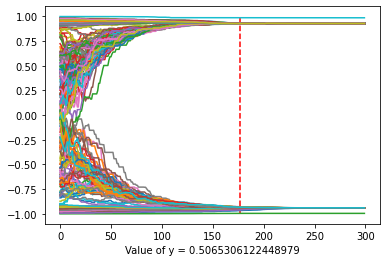

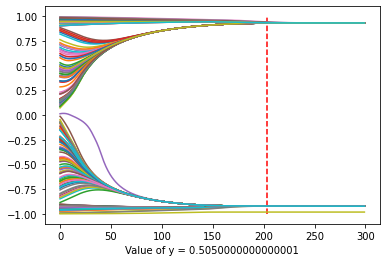

In [57]:
#run model
model = TheSimpliestModel(N)
agent_opinions = []
for i in range(300):
    model.step()
    #print('STEP=', i)
    agent_opinion = [a.opinion for a in model.schedule.agents]
    agent_opinions.append(agent_opinion)

agent_opinions = np.array(agent_opinions)

#find convergence    
a = int(N*pe*(1 - delta)/2)
b = N - int(N*pe*(1 - delta)/2)
moderate_agents = agent_opinions.T[a:b]
convergence = 0
y = []
for i in range(moderate_agents.shape[1]):
  became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
  became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
  y.append(became_extr_pos**2 + became_extr_neg**2)
sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
count = 0
for i in range(1, sum_of_opinions.shape[0]):
  if sum_of_opinions[i] == sum_of_opinions[i-1]:
    count +=1
  else:
    count = 0
  if count == 30:
    convergence = i
    pass
    
#plot graph
time = [i for i in range(300)]
agent_opinions = agent_opinions.T
fig, ax = plt.subplots()
for i in range(agent_opinions.shape[0]):
  ax.plot(time, agent_opinions[i]) 
ax.vlines(convergence, -1, 1, color = 'r', linestyle = 'dashed')
ax.set_xlabel('Value of y = '+ str(y[convergence]))
model = Model(N)
agent_opinions = []
for i in range(300):
    model.step()
    #print('STEP=', i)
    agent_opinion = [a.opinion for a in model.schedule.agents]
    agent_opinions.append(agent_opinion)
agent_opinions = np.array(agent_opinions)

#find convergence    
a = int(N*pe*(1 - delta)/2)
b = N - int(N*pe*(1 - delta)/2)
moderate_agents = agent_opinions.T[a:b]
convergence = 0
y = []
for i in range(moderate_agents.shape[1]):
  became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
  became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
  y.append(became_extr_pos**2 + became_extr_neg**2)
sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
count = 0
for i in range(1, sum_of_opinions.shape[0]):
  if sum_of_opinions[i] == sum_of_opinions[i-1]:
    count +=1
  else:
    count = 0
  if count == 30:
    convergence = i
    pass
#plot graph
time = [i for i in range(300)]
agent_opinions = agent_opinions.T
fig, ax = plt.subplots()
for i in range(agent_opinions.shape[0]):
  ax.plot(time, agent_opinions[i]) 
ax.vlines(convergence, -1, 1, color = 'r', linestyle = 'dashed')
ax.set_xlabel('Value of y = '+ str(y[convergence]))

plt.show()

Сделаем по 20 прогонов каждой модели и посмотрим статистику распределений скорости сходимости.

In [58]:
y_ = [] 
convergence_ = []
for k in range(20):
      
      #run model
      model = TheSimpliestModel(N)
      agent_opinions = []
      for i in range(300):
          model.step()
          #print('STEP=', i)
          agent_opinion = [a.opinion for a in model.schedule.agents]
          agent_opinions.append(agent_opinion)

      agent_opinions = np.array(agent_opinions)

      #find convergence    
      a = int(N*pe*(1 - delta)/2)
      b = N - int(N*pe*(1 - delta)/2)
      moderate_agents = agent_opinions.T[a:b]
      convergence = 0
      y = []
      for i in range(moderate_agents.shape[1]):
        became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
        became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
        y.append(became_extr_pos**2 + became_extr_neg**2)
      sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
      count = 0
      for i in range(1, sum_of_opinions.shape[0]):
        if sum_of_opinions[i] == sum_of_opinions[i-1]:
          count +=1
        else:
          count = 0
        if count == 30:
          convergence = i
          pass
      y_.append(y[convergence])
      convergence_.append(convergence)

In [59]:
np.mean(convergence_), np.var(convergence_)**0.5

(185.85, 22.676584839873925)

In [60]:
np.mean(y_), np.var(y_)**0.5

(0.5104234693877551, 0.014174596089567226)

In [61]:
y_2 = [] 
convergence_2 = []
for k in range(20):
      
      #run model
      model = Model(N)
      agent_opinions = []
      for i in range(300):
          model.step()
          #print('STEP=', i)
          agent_opinion = [a.opinion for a in model.schedule.agents]
          agent_opinions.append(agent_opinion)

      agent_opinions = np.array(agent_opinions)

      #find convergence    
      a = int(N*pe*(1 - delta)/2)
      b = N - int(N*pe*(1 - delta)/2)
      moderate_agents = agent_opinions.T[a:b]
      convergence = 0
      y = []
      for i in range(moderate_agents.shape[1]):
        became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
        became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
        y.append(became_extr_pos**2 + became_extr_neg**2)
      sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
      count = 0
      for i in range(1, sum_of_opinions.shape[0]):
        if sum_of_opinions[i] == sum_of_opinions[i-1]:
          count +=1
        else:
          count = 0
        if count == 30:
          convergence = i
          pass
      y_2.append(y[convergence])
      convergence_2.append(convergence)

In [62]:
np.mean(convergence_2), np.var(convergence_2)**0.5

(238.15, 32.94886189233249)

In [63]:
np.mean(y_2), np.var(y_2)**0.5

(0.5041198979591835, 0.006334443598930997)

In [64]:
from scipy import stats

In [65]:
stats.ks_2samp(convergence_, convergence_2)

Ks_2sampResult(statistic=0.8, pvalue=1.3259673752008224e-06)

In [66]:
stats.ks_2samp(y_, y_2)

Ks_2sampResult(statistic=0.35, pvalue=0.17453300569806826)

In [67]:
abs(np.mean(y_2) - np.mean(y_))

0.006303571428571519

p-value около 0, можно отвергнуть гипотезу о том, что распределения сходимостей одинаковые. То есть можно сделать вывод о том что отличие в скорости сходимости значимы, при данных параметрах сложная модель сходится дольше.

Рассмотрим другой набор параметров.

In [69]:
u = 1.2
ue = 0.1
mu = 0.5
N = 200
pe = 0.25
delta = 0

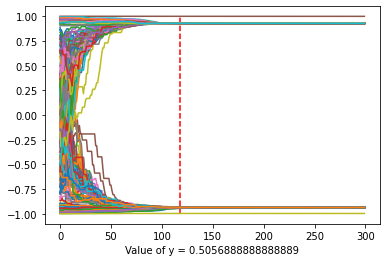

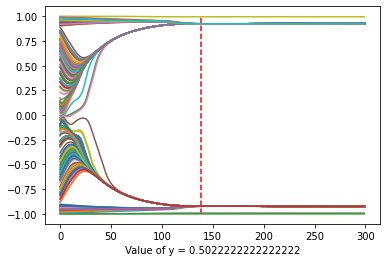

In [70]:
#run model
model = TheSimpliestModel(N)
agent_opinions = []
for i in range(300):
    model.step()
    #print('STEP=', i)
    agent_opinion = [a.opinion for a in model.schedule.agents]
    agent_opinions.append(agent_opinion)

agent_opinions = np.array(agent_opinions)

#find convergence    
a = int(N*pe*(1 - delta)/2)
b = N - int(N*pe*(1 - delta)/2)
moderate_agents = agent_opinions.T[a:b]
convergence = 0
y = []
for i in range(moderate_agents.shape[1]):
  became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
  became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
  y.append(became_extr_pos**2 + became_extr_neg**2)
sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
count = 0
for i in range(1, sum_of_opinions.shape[0]):
  if sum_of_opinions[i] == sum_of_opinions[i-1]:
    count +=1
  else:
    count = 0
  if count == 30:
    convergence = i
    pass
    
#plot graph
time = [i for i in range(300)]
agent_opinions = agent_opinions.T
fig, ax = plt.subplots()
for i in range(agent_opinions.shape[0]):
  ax.plot(time, agent_opinions[i]) 
ax.vlines(convergence, -1, 1, color = 'r', linestyle = 'dashed')
ax.set_xlabel('Value of y = '+ str(y[convergence]))
model = Model(N)
agent_opinions = []
for i in range(300):
    model.step()
    #print('STEP=', i)
    agent_opinion = [a.opinion for a in model.schedule.agents]
    agent_opinions.append(agent_opinion)
agent_opinions = np.array(agent_opinions)

#find convergence    
a = int(N*pe*(1 - delta)/2)
b = N - int(N*pe*(1 - delta)/2)
moderate_agents = agent_opinions.T[a:b]
convergence = 0
y = []
for i in range(moderate_agents.shape[1]):
  became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
  became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
  y.append(became_extr_pos**2 + became_extr_neg**2)
sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
count = 0
for i in range(1, sum_of_opinions.shape[0]):
  if sum_of_opinions[i] == sum_of_opinions[i-1]:
    count +=1
  else:
    count = 0
  if count == 30:
    convergence = i
    pass
#plot graph
time = [i for i in range(300)]
agent_opinions = agent_opinions.T
fig, ax = plt.subplots()
for i in range(agent_opinions.shape[0]):
  ax.plot(time, agent_opinions[i]) 
ax.vlines(convergence, -1, 1, color = 'r', linestyle = 'dashed')
ax.set_xlabel('Value of y = '+ str(y[convergence]))

plt.show()

Сделаем по 20 прогонов каждой модели и посмотрим статистику распределений скорости сходимости.

In [71]:
y_ = [] 
convergence_ = []
for k in range(20):
      
      #run model
      model = TheSimpliestModel(N)
      agent_opinions = []
      for i in range(300):
          model.step()
          #print('STEP=', i)
          agent_opinion = [a.opinion for a in model.schedule.agents]
          agent_opinions.append(agent_opinion)

      agent_opinions = np.array(agent_opinions)

      #find convergence    
      a = int(N*pe*(1 - delta)/2)
      b = N - int(N*pe*(1 - delta)/2)
      moderate_agents = agent_opinions.T[a:b]
      convergence = 0
      y = []
      for i in range(moderate_agents.shape[1]):
        became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
        became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
        y.append(became_extr_pos**2 + became_extr_neg**2)
      sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
      count = 0
      for i in range(1, sum_of_opinions.shape[0]):
        if sum_of_opinions[i] == sum_of_opinions[i-1]:
          count +=1
        else:
          count = 0
        if count == 30:
          convergence = i
          pass
      y_.append(y[convergence])
      convergence_.append(convergence)

In [72]:
np.mean(convergence_), np.var(convergence_)**0.5

(165.0, 53.72615750265414)

In [73]:
np.mean(y_), np.var(y_)**0.5

(0.5138044444444445, 0.021075658652918088)

In [74]:
y_2 = [] 
convergence_2 = []
for k in range(20):
      
      #run model
      model = Model(N)
      agent_opinions = []
      for i in range(300):
          model.step()
          #print('STEP=', i)
          agent_opinion = [a.opinion for a in model.schedule.agents]
          agent_opinions.append(agent_opinion)

      agent_opinions = np.array(agent_opinions)

      #find convergence    
      a = int(N*pe*(1 - delta)/2)
      b = N - int(N*pe*(1 - delta)/2)
      moderate_agents = agent_opinions.T[a:b]
      convergence = 0
      y = []
      for i in range(moderate_agents.shape[1]):
        became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
        became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
        y.append(became_extr_pos**2 + became_extr_neg**2)
      sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
      count = 0
      for i in range(1, sum_of_opinions.shape[0]):
        if sum_of_opinions[i] == sum_of_opinions[i-1]:
          count +=1
        else:
          count = 0
        if count == 30:
          convergence = i
          pass
      y_2.append(y[convergence])
      convergence_2.append(convergence)

In [75]:
np.mean(convergence_2), np.var(convergence_2)**0.5

(96.75, 57.60284281179185)

In [76]:
np.mean(y_2), np.var(y_2)**0.5

(0.18470666666666669, 0.3189413800855327)

In [81]:
np.max(y_2), np.min(y_2)

(0.8755555555555556, 0.0)

Разброс значений очень большой, сходимость разных типов, сравнивать статистику будет некорректно.

### 3.3. y = 1 - односторонняя сходимость. 

In [82]:
u = 2.0
pe = 0.2
ue = 0.1
mu = 0.25
N = 200
delta = 0.5

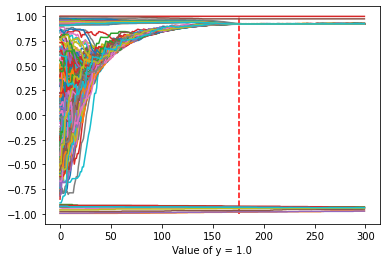

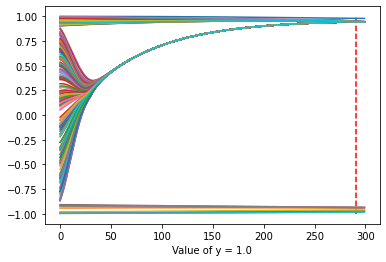

In [83]:
#run model
model = TheSimpliestModel(N)
agent_opinions = []
for i in range(300):
    model.step()
    #print('STEP=', i)
    agent_opinion = [a.opinion for a in model.schedule.agents]
    agent_opinions.append(agent_opinion)

agent_opinions = np.array(agent_opinions)

#find convergence    
a = int(N*pe*(1 - delta)/2)
b = N - int(N*pe*(1 - delta)/2)
moderate_agents = agent_opinions.T[a:b]
convergence = 0
y = []
for i in range(moderate_agents.shape[1]):
  became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
  became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
  y.append(became_extr_pos**2 + became_extr_neg**2)
sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
count = 0
for i in range(1, sum_of_opinions.shape[0]):
  if sum_of_opinions[i] == sum_of_opinions[i-1]:
    count +=1
  else:
    count = 0
  if count == 30:
    convergence = i
    pass
    
#plot graph
time = [i for i in range(300)]
agent_opinions = agent_opinions.T
fig, ax = plt.subplots()
for i in range(agent_opinions.shape[0]):
  ax.plot(time, agent_opinions[i]) 
ax.vlines(convergence, -1, 1, color = 'r', linestyle = 'dashed')
ax.set_xlabel('Value of y = '+ str(y[convergence]))
model = Model(N)
agent_opinions = []
for i in range(300):
    model.step()
    #print('STEP=', i)
    agent_opinion = [a.opinion for a in model.schedule.agents]
    agent_opinions.append(agent_opinion)
agent_opinions = np.array(agent_opinions)

#find convergence    
a = int(N*pe*(1 - delta)/2)
b = N - int(N*pe*(1 - delta)/2)
moderate_agents = agent_opinions.T[a:b]
convergence = 0
y = []
for i in range(moderate_agents.shape[1]):
  became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
  became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
  y.append(became_extr_pos**2 + became_extr_neg**2)
sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
count = 0
for i in range(1, sum_of_opinions.shape[0]):
  if sum_of_opinions[i] == sum_of_opinions[i-1]:
    count +=1
  else:
    count = 0
  if count == 30:
    convergence = i
    pass
#plot graph
time = [i for i in range(300)]
agent_opinions = agent_opinions.T
fig, ax = plt.subplots()
for i in range(agent_opinions.shape[0]):
  ax.plot(time, agent_opinions[i]) 
ax.vlines(convergence, -1, 1, color = 'r', linestyle = 'dashed')
ax.set_xlabel('Value of y = '+ str(y[convergence]))

plt.show()

Сделаем по 20 прогонов каждой модели и посмотрим статистику распределений скорости сходимости.

In [84]:
y_ = [] 
convergence_ = []
for k in range(20):
      
      #run model
      model = TheSimpliestModel(N)
      agent_opinions = []
      for i in range(300):
          model.step()
          #print('STEP=', i)
          agent_opinion = [a.opinion for a in model.schedule.agents]
          agent_opinions.append(agent_opinion)

      agent_opinions = np.array(agent_opinions)

      #find convergence    
      a = int(N*pe*(1 - delta)/2)
      b = N - int(N*pe*(1 - delta)/2)
      moderate_agents = agent_opinions.T[a:b]
      convergence = 0
      y = []
      for i in range(moderate_agents.shape[1]):
        became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
        became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
        y.append(became_extr_pos**2 + became_extr_neg**2)
      sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
      count = 0
      for i in range(1, sum_of_opinions.shape[0]):
        if sum_of_opinions[i] == sum_of_opinions[i-1]:
          count +=1
        else:
          count = 0
        if count == 30:
          convergence = i
          pass
      y_.append(y[convergence])
      convergence_.append(convergence)

In [85]:
np.mean(convergence_), np.var(convergence_)**0.5

(207.95, 42.478788824541596)

In [86]:
np.mean(y_), np.var(y_)**0.5

(0.992270061728395, 0.010524453651238342)

In [87]:
y_2 = [] 
convergence_2 = []
for k in range(20):
      
      #run model
      model = Model(N)
      agent_opinions = []
      for i in range(300):
          model.step()
          #print('STEP=', i)
          agent_opinion = [a.opinion for a in model.schedule.agents]
          agent_opinions.append(agent_opinion)

      agent_opinions = np.array(agent_opinions)

      #find convergence    
      a = int(N*pe*(1 - delta)/2)
      b = N - int(N*pe*(1 - delta)/2)
      moderate_agents = agent_opinions.T[a:b]
      convergence = 0
      y = []
      for i in range(moderate_agents.shape[1]):
        became_extr_pos = np.where(moderate_agents.T[i] > 0.85)[0].shape[0]/moderate_agents.shape[0] 
        became_extr_neg = np.where(moderate_agents.T[i] < -0.85)[0].shape[0]/moderate_agents.shape[0]
        y.append(became_extr_pos**2 + became_extr_neg**2)
      sum_of_opinions = np.round(np.sum(abs(moderate_agents), axis = 0)/N, decimals = 2)
      count = 0
      for i in range(1, sum_of_opinions.shape[0]):
        if sum_of_opinions[i] == sum_of_opinions[i-1]:
          count +=1
        else:
          count = 0
        if count == 30:
          convergence = i
          pass
      y_2.append(y[convergence])
      convergence_2.append(convergence)

In [88]:
np.mean(convergence_2), np.var(convergence_2)**0.5

(231.5, 25.74781544131463)

In [89]:
np.mean(y_2), np.var(y_2)**0.5

(1.0, 0.0)

In [90]:
stats.ks_2samp(convergence_, convergence_2)

Ks_2sampResult(statistic=0.5, pvalue=0.012298612583953778)

In [91]:
stats.ks_2samp(y_, y_2)

Ks_2sampResult(statistic=0.4, pvalue=0.08105771161340149)

In [92]:
abs(np.mean(y_2) - np.mean(y_))

0.0077299382716049525

p-value около 0, можно отвергнуть гипотезу о том, что распределения сходимости одинаковые. То есть можно сделать вывод о том что отличие в скорости сходимости значимы, при данных параметрах сложная модель сходится дольше.

Общий вывод: при рассмотренных параметрах сложная модель сходится за такое же время или дольше, чем простая. Это связано с тем, что сначала влияние агентов (не экстремистов) друг на друга велико, и они сходятся к общему мнению, и только потом все сходятся к мнению экстремистов. Зато графики красивые)